In [1]:
#!/usr/bin/env Rscript
#setwd('analysis')
##########################
library(scales)
library(plyr)
library(Seurat)
library(dplyr)
library(patchwork)
library(ggplot2)
library(cowplot)
library("viridis")  
library(RColorBrewer)
library("viridis")
library(Matrix)
library(readxl)
library(caTools)
library(randomForest)

library("ggpubr")

Attaching SeuratObject


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



다음의 패키지를 부착합니다: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots


필요한 패키지를 로딩중입니다: viridisLite


다음의 패키지를 부착합니다: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


다음의 패키지를 부착합니다: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



다음의 패키지를 부착합니다: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend


The following object is masked from ‘package:plyr’:

  

In [2]:
# Reading Datafile and Metadata

data=readRDS('../Data_BBB/brain.BBB.human.vascular.final.Jan2022.rds')
meta=readRDS('../Data_BBB/brain.BBB.human.vascular.final.Jan2022.metadata.rds')
patient_info=read_excel('../Data_BBB/SampleInfo_BBB_Age_and_sex.xlsx')
brain=CreateSeuratObject(counts = data, project = "BBB", meta.data=meta,min.cells = 1, min.features = 1)






Warning message in CreateSeuratObject.default(counts = data, project = "BBB", meta.data = meta, :
“Some cells in meta.data not present in provided counts matrix”


18:12:45 UMAP embedding parameters a = 0.9922 b = 1.112

18:12:45 Read 4968 rows and found 30 numeric columns

18:12:45 Using Annoy for neighbor search, n_neighbors = 30

18:12:45 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:12:46 Writing NN index file to temp file /var/folders/jx/rq_jr02135l_jt9wtyd2x47c0000gn/T//Rtmp0kdoTk/file12f9a37b07a30

18:12:46 Searching Annoy index using 1 thread, search_k = 3000

18:12:48 Annoy recall = 100%

18:12:48 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

18:12:49 Initializing from normalized Laplacian + noise (using irlba)

18:12:49 Commencing optimization for 500 epochs, with 204062 positive edges

18:13:02 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4968
Number of edges: 173350

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9190
Number of communities: 16
Elapsed time: 0 seconds


pdf 
  2

pdf 
  2

pdf 
  2

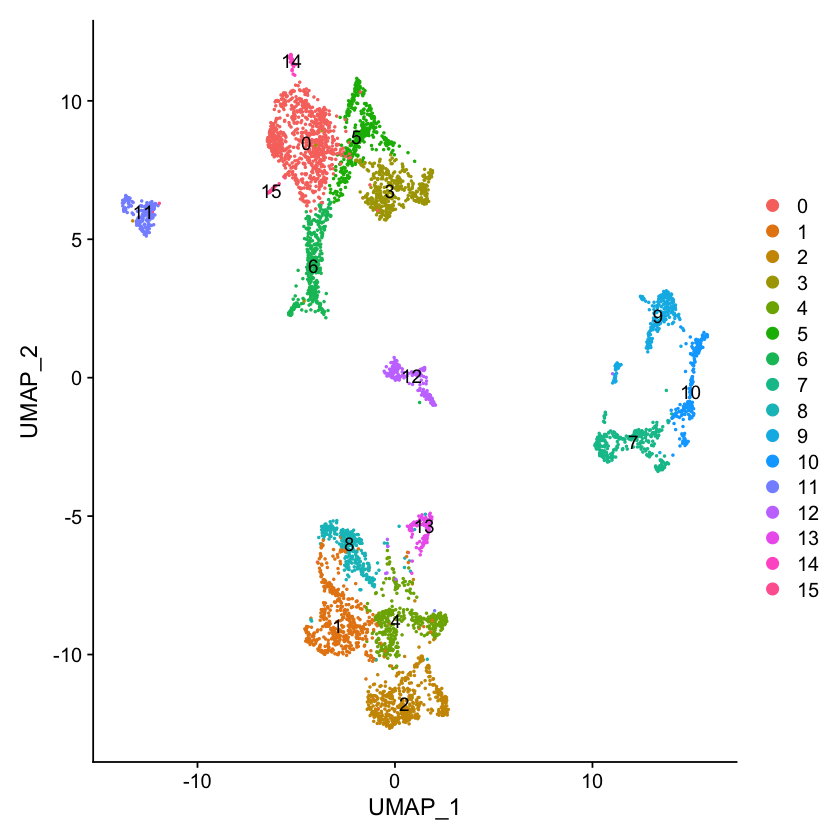

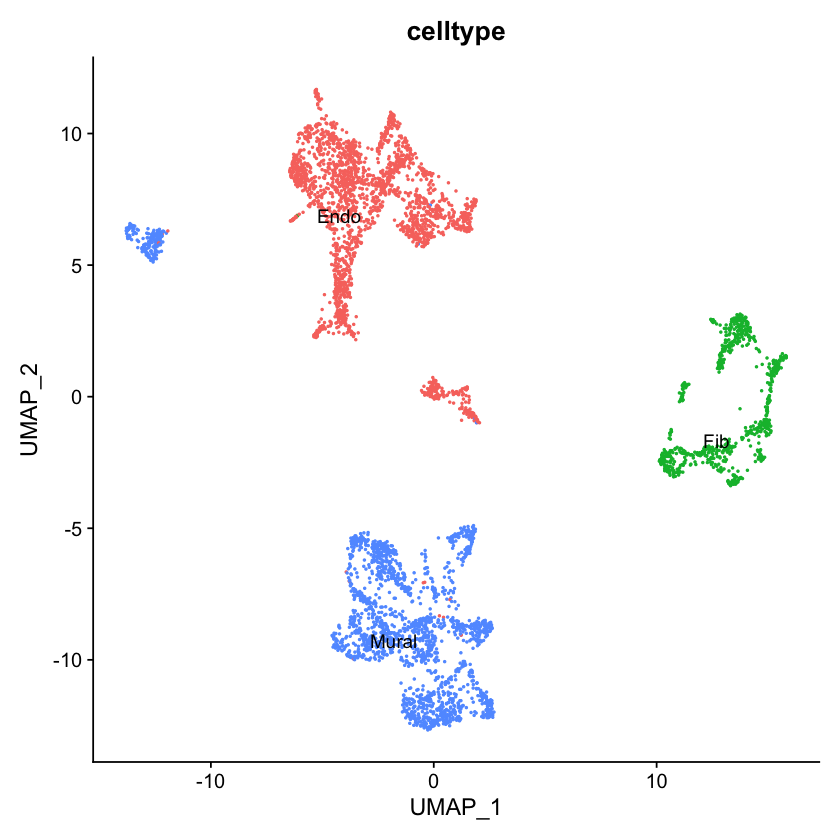

pdf 
  2

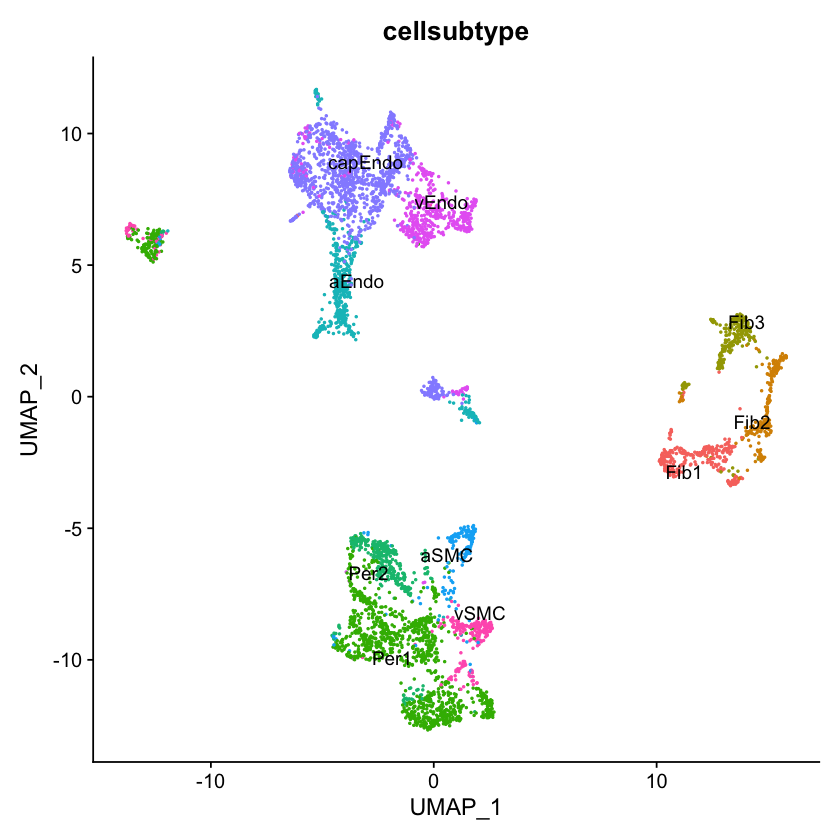

In [6]:

# Normalization
brain <- NormalizeData(brain, normalization.method = "LogNormalize", scale.factor = 10000)
# Feature selction
brain <- FindVariableFeatures(brain, selection.method = "vst", nfeatures = 2000)

# Run the standard workflow for visualization and clustering
brain <- ScaleData(brain, verbose = FALSE)
brain <- RunPCA(brain, npcs = 30, verbose = FALSE)
brain <- RunUMAP(brain, reduction = "pca", dims = 1:30)
brain <- FindNeighbors(brain, dims = 1:30)
brain <- FindClusters(brain, resolution = 0.5)

# Generate the UMAP plot
plot <- DimPlot(brain, reduction = "umap",label=T)

# Save the plot as PDF
pdf("../Figures/FeaturePlot_cell_UMAP_vascular.pdf")
print(plot)
dev.off()

DimPlot(brain, reduction = "umap",label=T)

# Generate the UMAP plot by celltype
plot <- DimPlot(brain, reduction = "umap", group.by = "celltype", label = TRUE, repel = TRUE) + NoLegend()

# Save the plot as PDF
pdf("../Figures/FeaturePlot_cell_celltype.pdf")
print(plot)
dev.off()

# Generate the UMAP plot by cellsubtype
plot <- DimPlot(brain, reduction = "umap", group.by = "cellsubtype", label = TRUE, repel = TRUE) + NoLegend()

# Save the plot as PDF
pdf("../Figures/FeaturePlot_cell_subtype.pdf")
print(plot)
dev.off()

DimPlot(brain, reduction = "umap", group.by = "celltype", label = TRUE, repel = TRUE) + NoLegend()
DimPlot(brain, reduction = "umap", group.by = "cellsubtype", label = TRUE, repel = TRUE) + NoLegend()

# Generate the UMAP plot by cellsubtype
plot <- FeaturePlot(brain, features=c('CD19'), min.cutoff = 'q10', max.cutoff = 'q95')

# Save the plot as PDF
pdf(file="../Figures/FeaturePlot_cell_CD19.jpeg")
print(plot)
dev.off()


